# Imports

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from collections import OrderedDict
import matplotlib.pyplot as plt
import helper

# Training data

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])

trainset = datasets.FashionMNIST('~/.pytorch/FashionMNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

### Visualize

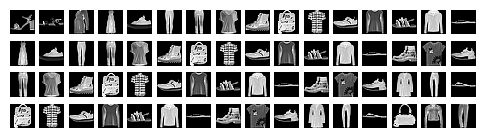

In [4]:
images, labels = next(iter(trainloader))

fig, ax = plt.subplots(4,16, dpi=100)
for irow in range(ax.shape[0]):
    for icol in range(ax.shape[1]):
        ax[irow,icol].imshow(images[(ax.shape[0]-1)*irow + icol].squeeze(), cmap='gray')
        ax[irow,icol].axis('off')
plt.subplots_adjust(hspace=-0.85)
plt.show()

# Model

In [47]:
input_size = 784
hidden_sizes = [256, 128, 64]
output_size = 10
units = [input_size] + hidden_sizes + [output_size]

# Define model in pytorch
model = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(units[0], units[1])),
    ('relu1', nn.ReLU()),
    ('fc2', nn.Linear(units[1], units[2])),
    ('relu2', nn.ReLU()),
    ('fc3', nn.Linear(units[2], units[3])),
    ('relu3', nn.ReLU()),
    ('fc4', nn.Linear(units[3], units[4])),
    ('log-softmax', nn.LogSoftmax(dim=1))
]))
print(model)

# Use negative log-likelihood loss and SGD optimizer.
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

Sequential(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (log-softmax): LogSoftmax()
)


# Training

In [48]:
# Train for several epoch.
n_epochs = 15
for iepoch in range(n_epochs):
    cost = 0
    # Get a batch of images and train
    for images, labels in trainloader:
        # Flatten images
        images = images.view(images.shape[0],-1)        
        # Forward pass (compute output) and loss
        output = model.forward(images)
        loss = criterion(output, labels)
        # Backpropagation and update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Accumulate cost for each image in the batch
        cost += loss.item()
    print('Training cost = {:0.4}'.format(cost/len(trainloader)) )

Training cost = 0.5162
Training cost = 0.3877
Training cost = 0.3515
Training cost = 0.3295
Training cost = 0.3112
Training cost = 0.3009
Training cost = 0.285
Training cost = 0.2781
Training cost = 0.269
Training cost = 0.2595
Training cost = 0.2524
Training cost = 0.2488
Training cost = 0.2434
Training cost = 0.2375
Training cost = 0.2318


# Testing

In [49]:
testset = datasets.FashionMNIST('~/.pytorch/FashionMNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, shuffle=True)

True/Predicted labels: 0/0


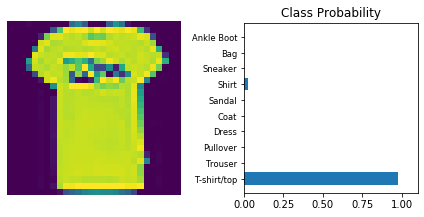

In [50]:
test_image, test_labels = next(iter(testloader))
test_image = test_image.view(1,28,28)
flatten_test_image = test_image.view(1,input_size)

with torch.no_grad():
    pred_image = model(flatten_test_image)

ps = torch.exp(pred_image)
helper.view_classify(test_image, ps, version='Fashion')

print('True/Predicted labels: {}/{}'.format(int(test_labels), int(torch.argmax(ps))))

In [51]:
correct = 0
for i in range(len(testset)):
    image, label = testset[i] # Test image and label
    flat_image = image.view(1, input_size) # Flatten image
    with torch.no_grad():
        log_softmax = model(flat_image) # Predicted 
    label_probs = torch.exp(log_softmax)
    label_pred = torch.argmax(label_probs)
    if int(label_pred) == label:
        correct += 1
print('Test accuracy: {}%'.format(100 * correct / len(testset)))

Test accuracy: 87.57%
